<a href="https://colab.research.google.com/github/Amitsen1014/gcp-amit/blob/main/Regression_Yulu_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Yulu Bike Sharing Demand Prediction


##### **Project Type**    - Regression -ML Project
##### **Contribution**    - Individual

# **Project Summary -**




Urban transportation systems are evolving rapidly to meet the growing demand for sustainable, affordable, and eco-friendly mobility solutions. One such initiative is the bike-sharing system implemented in Seoul, which allows citizens and tourists to conveniently rent bicycles on an hourly basis. However, predicting bike demand accurately is critical for the smooth functioning of such systems. Demand fluctuates depending on time of day, weather conditions, seasonal variations, holidays, and working days, making it a complex forecasting problem.

This project aims to build a machine learning-based predictive model to forecast hourly bike rental demand. By accurately predicting demand, the Seoul bike-sharing program can optimize resource allocation, reduce operational inefficiencies, and improve customer satisfaction.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

The goal is to accurately predict hourly bike rental demand in Seoul using weather, seasonal, and calendar data. This helps optimize bike availability, reduce operational costs, and improve customer satisfaction in the bike-sharing system.

Need to Build Some Regression model for prediction

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [52]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Projectes/Seoul Bike Project/SeoulBikeData.csv",encoding="latin1")

### Dataset First View

In [55]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [56]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [57]:
# Dataset Rows & Columns count

print(f"Row Count-{df.shape[0]} \nColumn Count -{df.shape[1]}"  )

Row Count-8760 
Column Count -14


### Dataset Information

In [58]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [59]:
# Dataset Duplicate Value Count
df.duplicated().sum()
# There is no duplicate Value found

np.int64(0)

#### Missing Values/Null Values

In [60]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

# There is no Missing Value found !!

np.int64(0)

In [61]:
# Visualizing the missing values
# There is no Missing Value found !!

### What did you know about your dataset?

Answer-
1. Data type of Date field is need to be Change From Object to Datetime.
2. 3 Categorical Columns available which need to treated for further encoding.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## ***2. Understanding Your Variables***

In [63]:
# Dataset Columns
for colunm in df.columns:
  print(colunm)

Date
Rented Bike Count
Hour
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Seasons
Holiday
Functioning Day


In [64]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

Answer Here
1. Bike rented count ranges between 0 to 3556.
2. Temp is declined upto -17c and with high of 39c.
4. Post 5:25 PM there is very few bike rented out.

### Check Unique Values for each variable.

In [65]:
# Check Unique Values for each variable.
for column in df.columns:
  print(f"{column} - {df[column].unique()}")
  print ("-"*40)

Date - ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [66]:
# Write your code to make your dataset analysis ready.

# Covert Date to Datetime Datatype
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [67]:
# Segementation of Hours
def timeduration(Hour):
  if Hour<=5:
    return "Night"
  elif Hour<=12:
    return "Morning"
  elif Hour<=18:
    return "Afternoon"
  else:
    return "Evening"

df["DayPart"] = df["Hour"].apply(timeduration)

In [68]:
# Distributing DataFrame into Numerical and Cateogrical columns
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

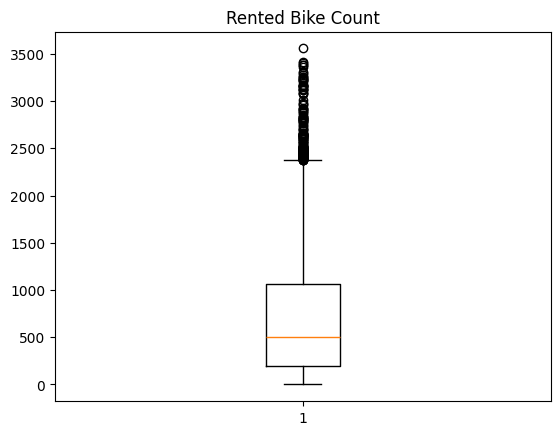

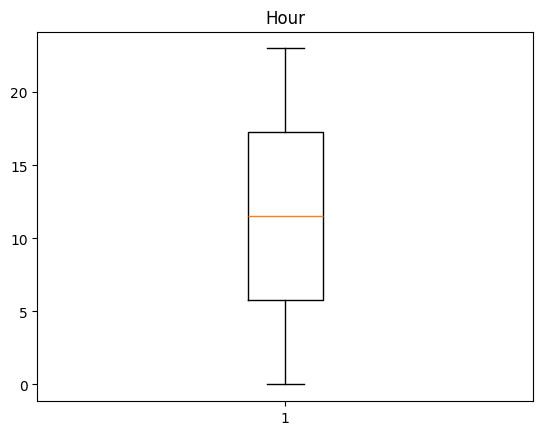

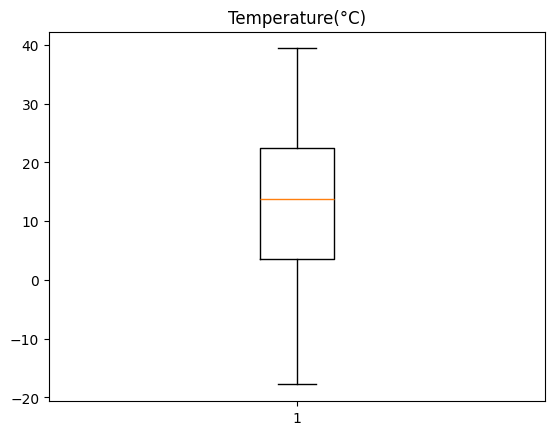

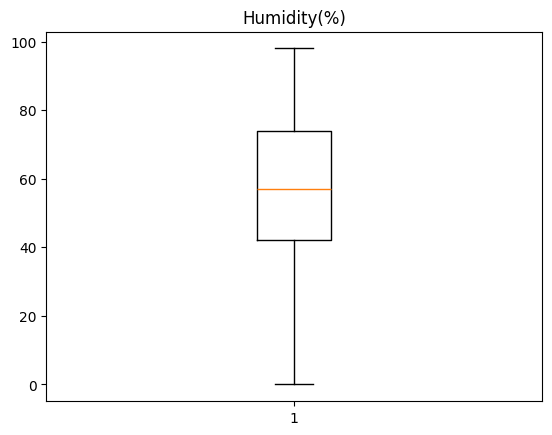

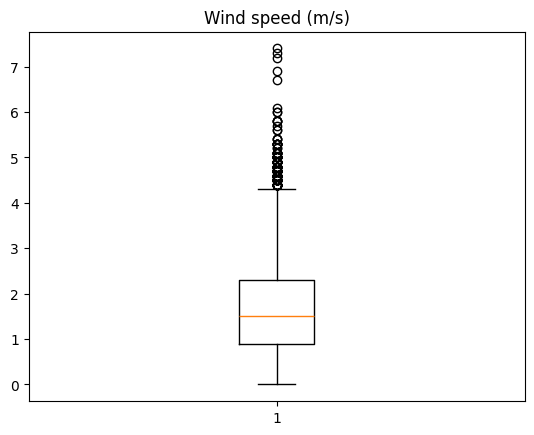

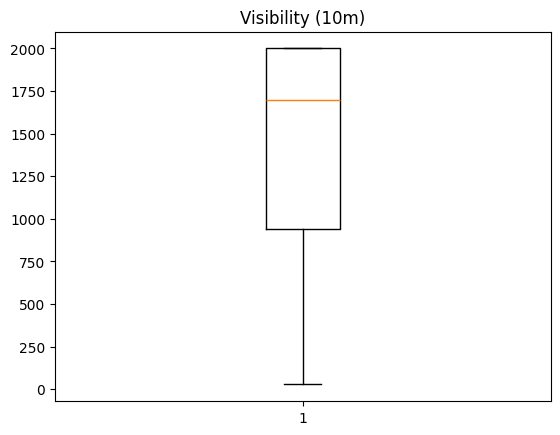

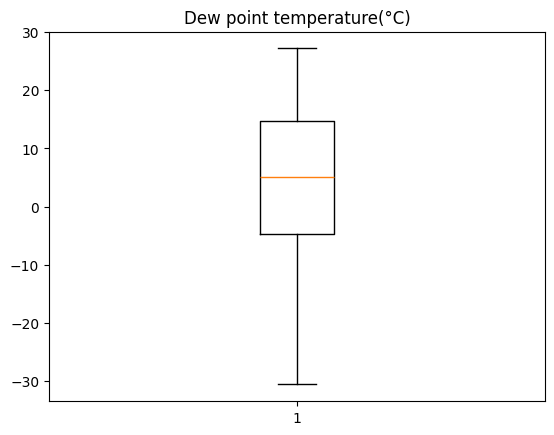

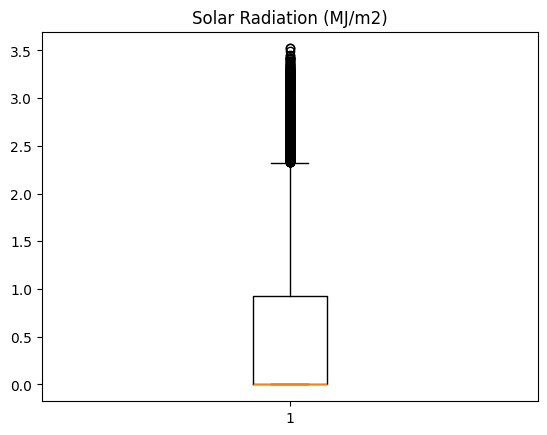

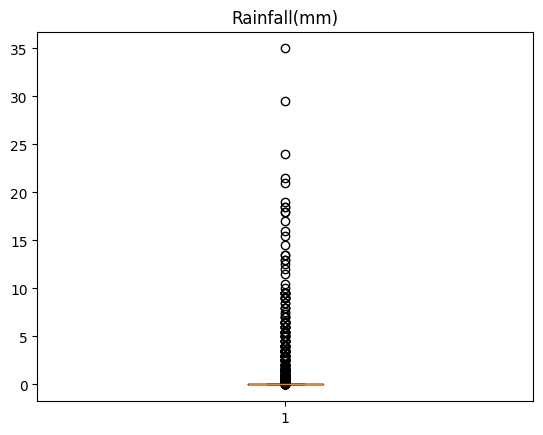

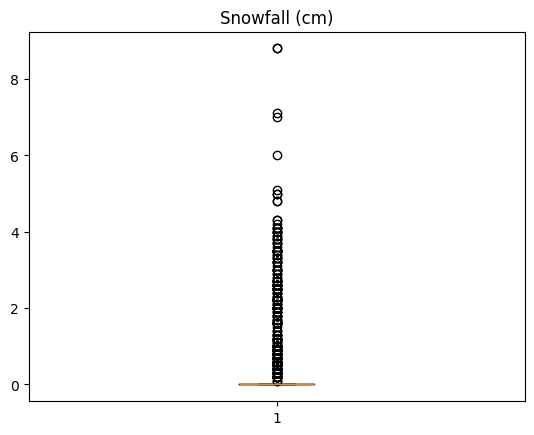

In [69]:
# Ploting Box Plot for Understanding Data Distribution
for column in df_num.columns:
  plt.boxplot(df_num[column])
  plt.title(column)
  plt.show()

### What all manipulations have you done and insights you found?

Answer Here.
1. Date columns was not in Datetime format Hence convert to datetime format.
2. There are Outliers in salar Radiation,Wind speed, Rented Bike count.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

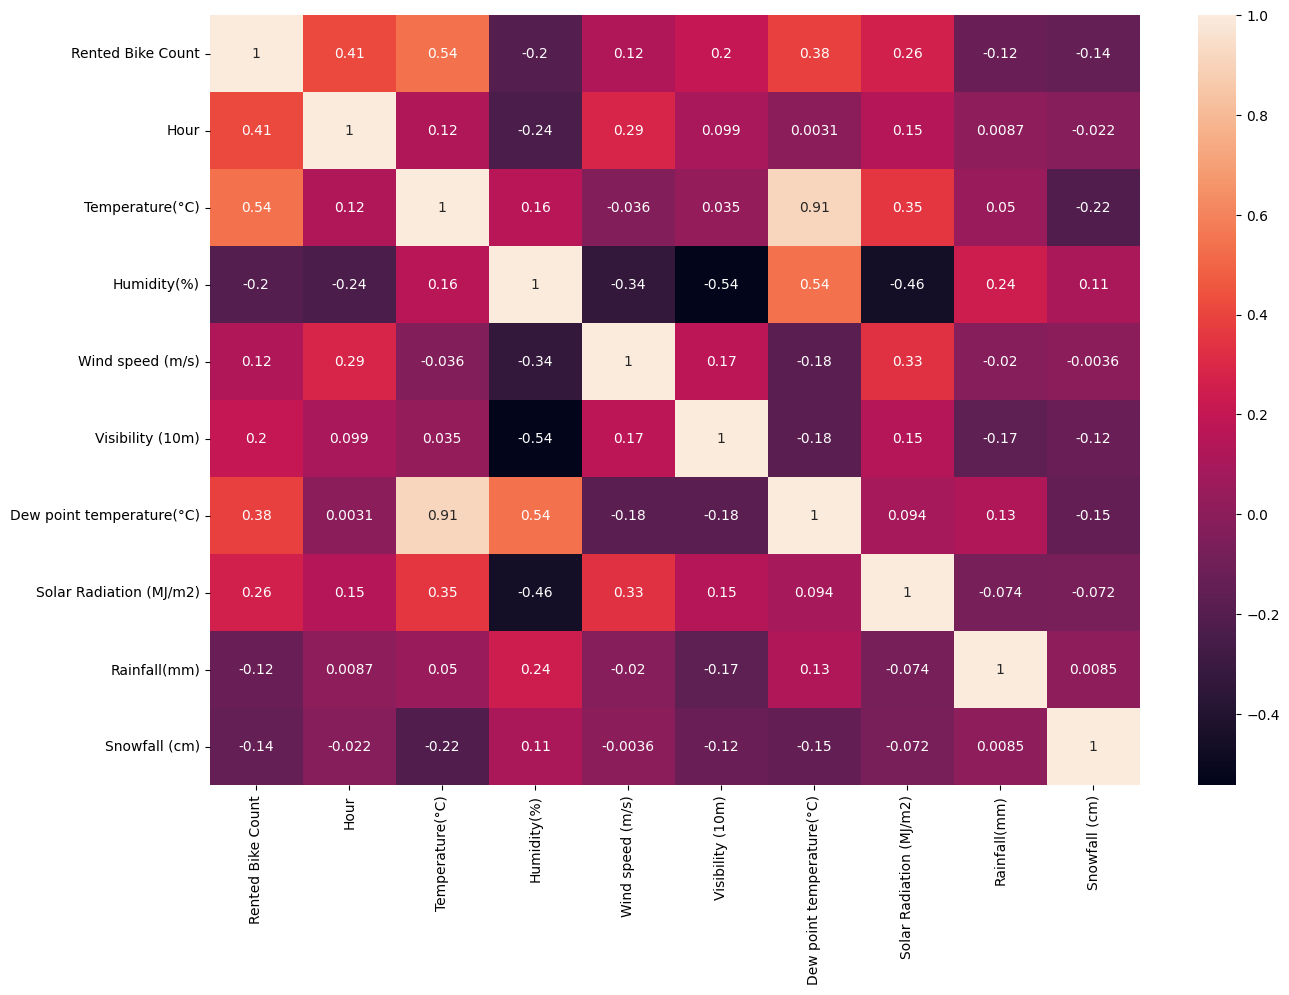

In [70]:
# Chart - 1 Heatmap for correlation
# visualization code
df_corr = df_num.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Choosed for Heatmap because its good chart to demonstrate corrlation among variables with color coding.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Found Good correlation among Temprature ,Humidity ,Dew Point Temprature.

#### Chart - 2

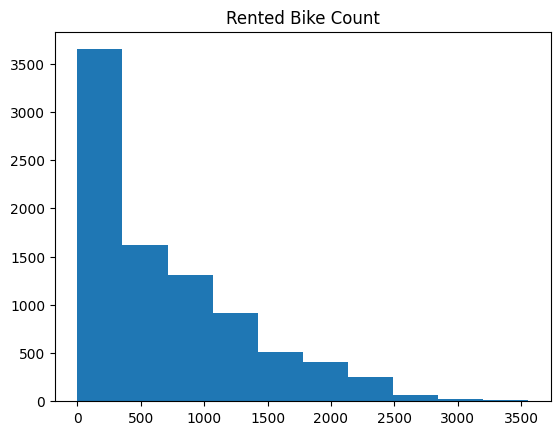

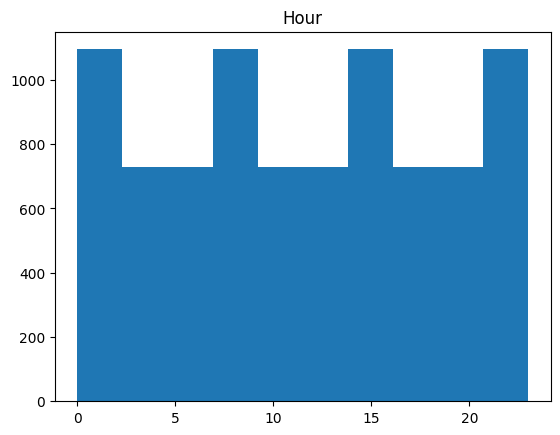

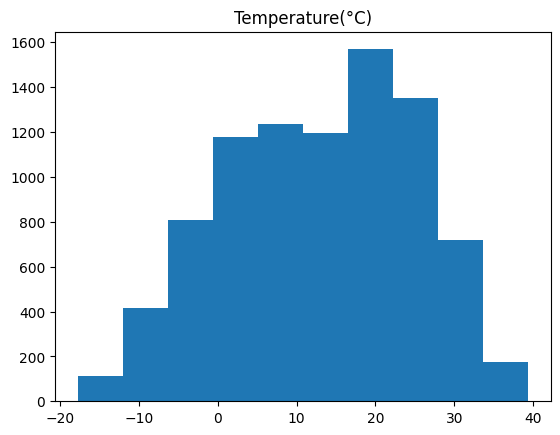

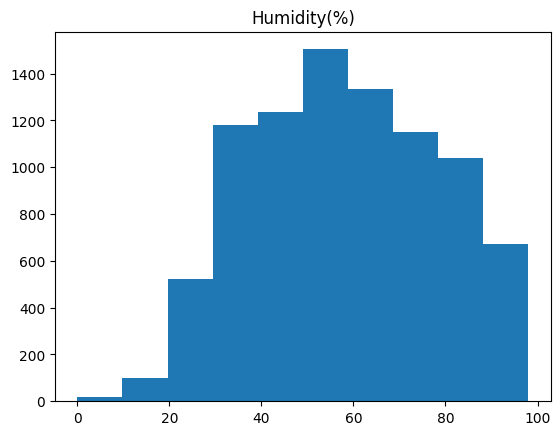

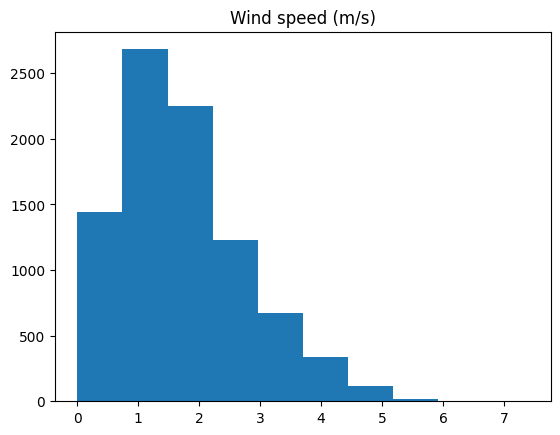

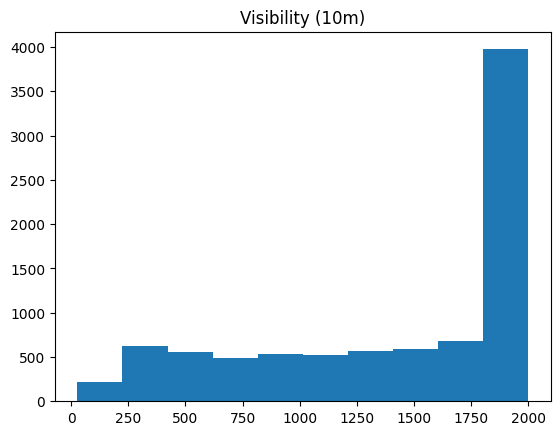

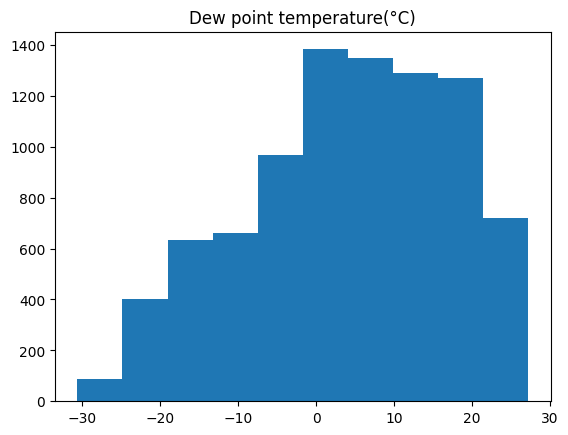

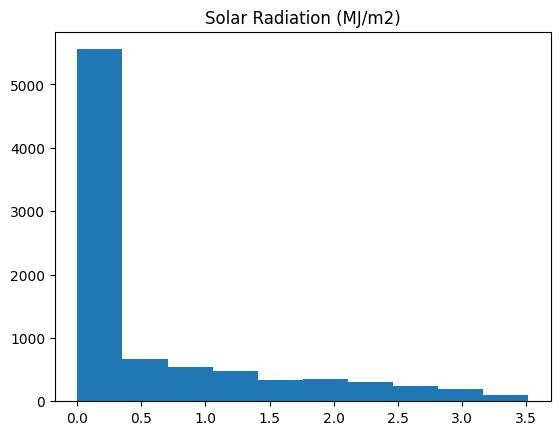

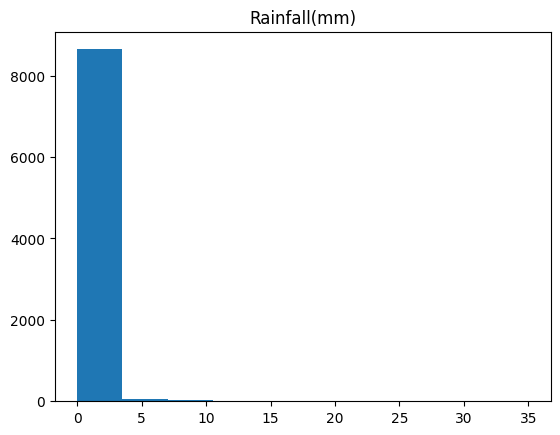

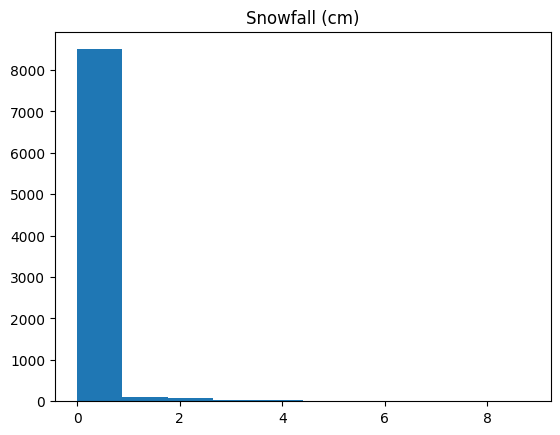

In [71]:
# Chart - 2 Histogram
# visualization code
for column in df_num.columns:
  plt.hist(df_num[column])
  plt.title(column)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Histogram is Good Chart to demonstrate Data Distribution ,how overall data has been distributed.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insight is as follows:

most values for rainfall and snowfall are distributed around 0. Therefore, the remaining values can be treated as outliers if they are not genuinely distributed, or they may be insufficient to predict the target."


#### Chart - 3

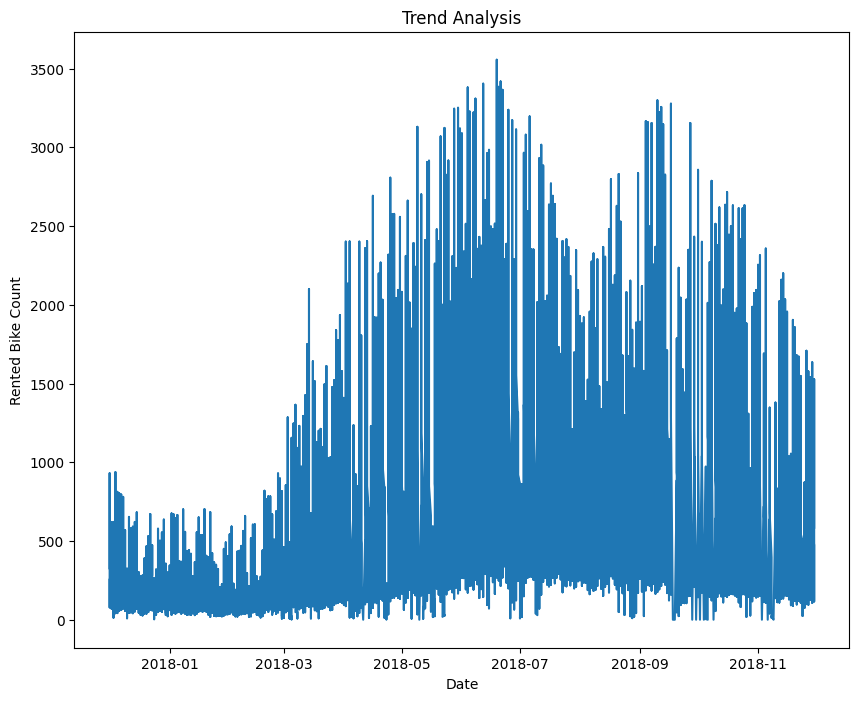

In [72]:
# Chart - 3 Line Chart For trend analysis
# visualization code

plt.figure(figsize=(10,8))
plt.plot(df['Date'],df['Rented Bike Count'])
plt.title("Trend Analysis")
plt.xlabel("Date")
plt.ylabel("Rented Bike Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Line Charge is used to analysis trend over time hence used to demonstrat bike rented over time period.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is no significient impact of any specific date or year found.

#### Chart - 4

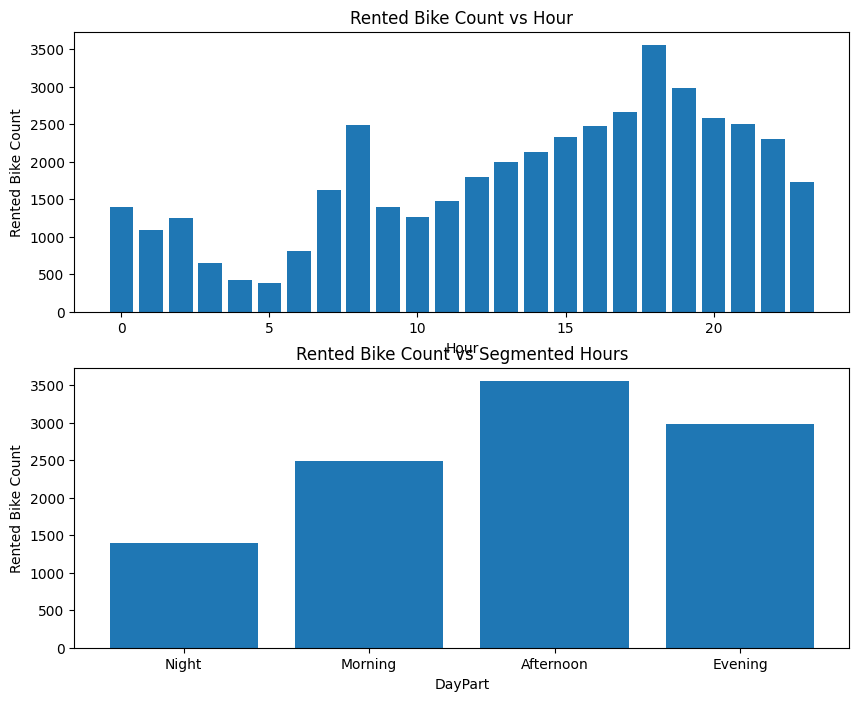

In [73]:
# Chart - 4 bar Chart between Hours and Rented bike count
#visualization code
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.bar(df['Hour'],df['Rented Bike Count'])
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.subplot(212)
plt.bar(df['DayPart'],df['Rented Bike Count'])
plt.title("Rented Bike Count vs Segmented Hours")
plt.xlabel("DayPart")
plt.ylabel("Rented Bike Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar char used to demonstrate value or trend over categoricial data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insight we found that Rented Bike Count is high in afternoon followed by evening hours.

#### Chart - 5

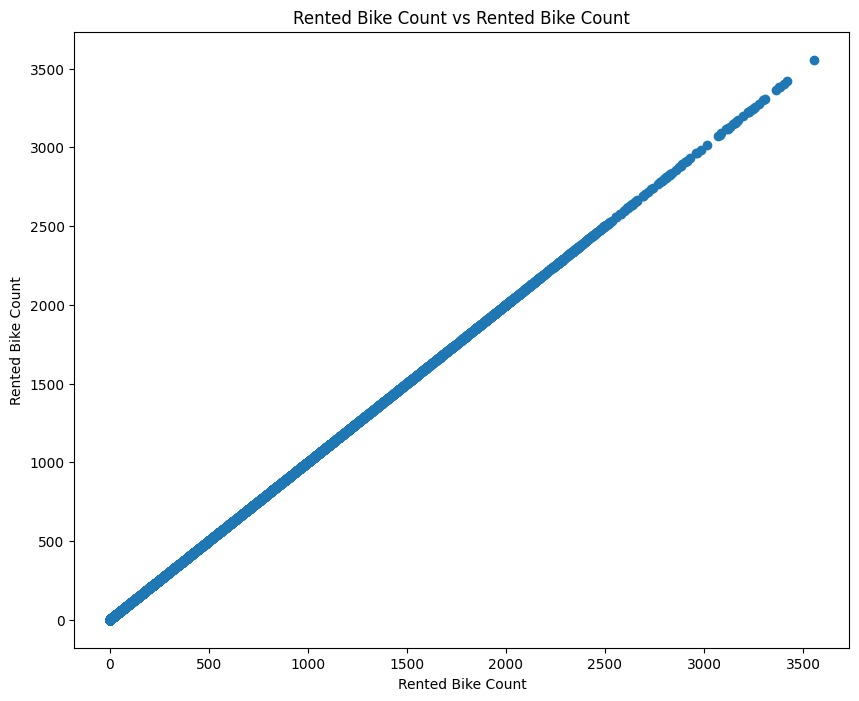

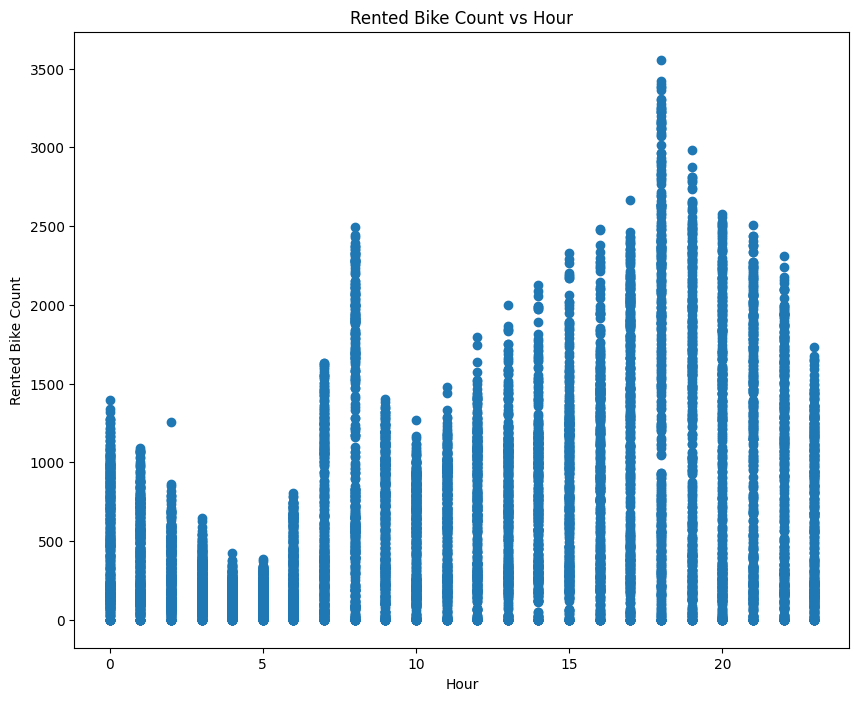

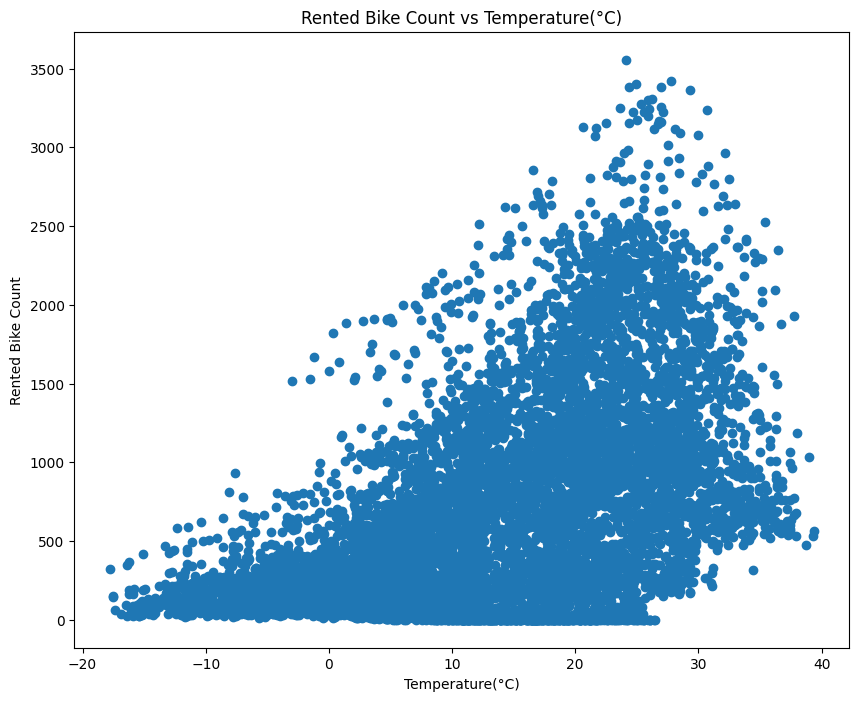

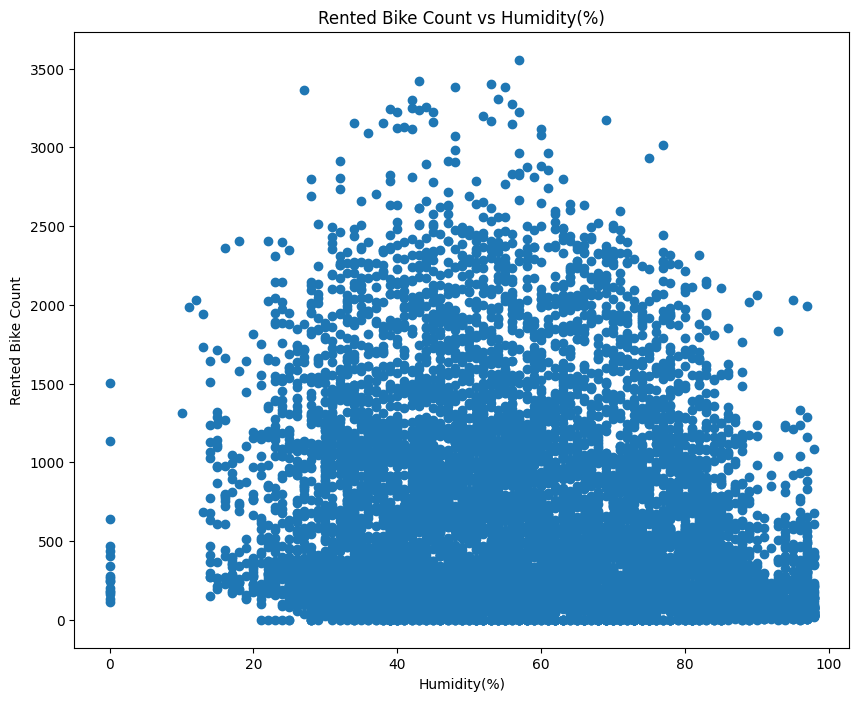

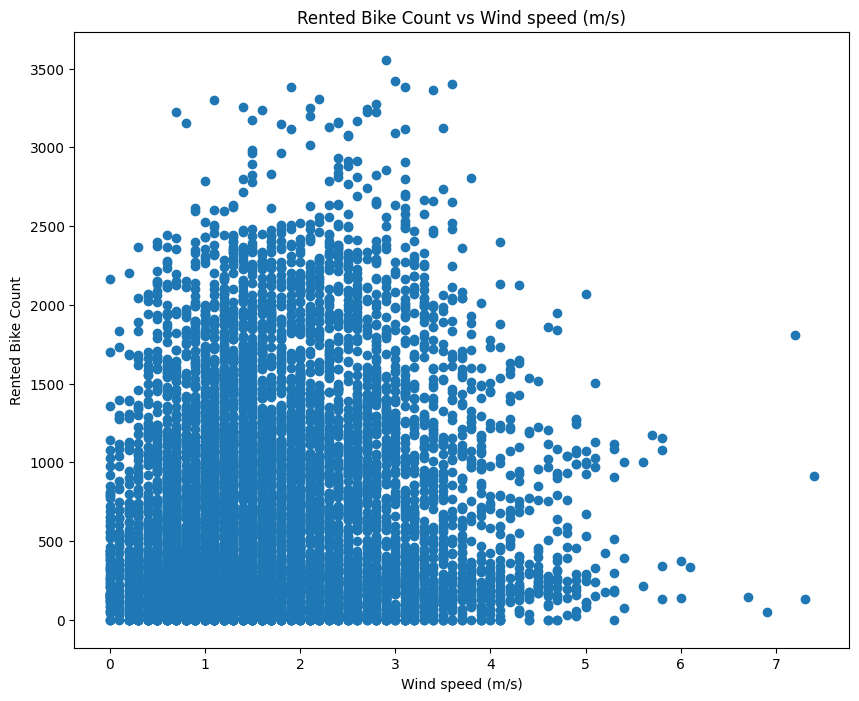

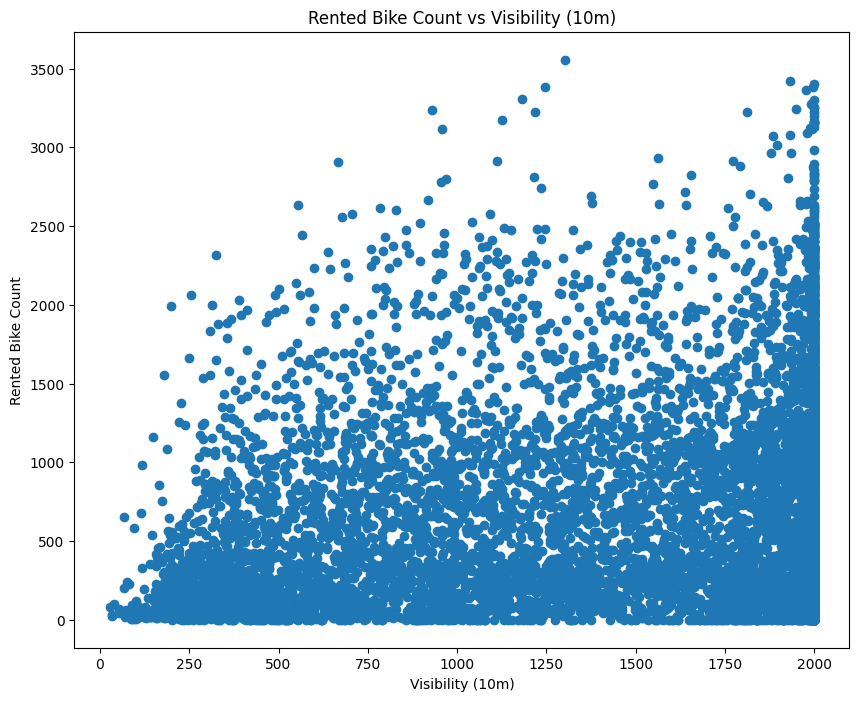

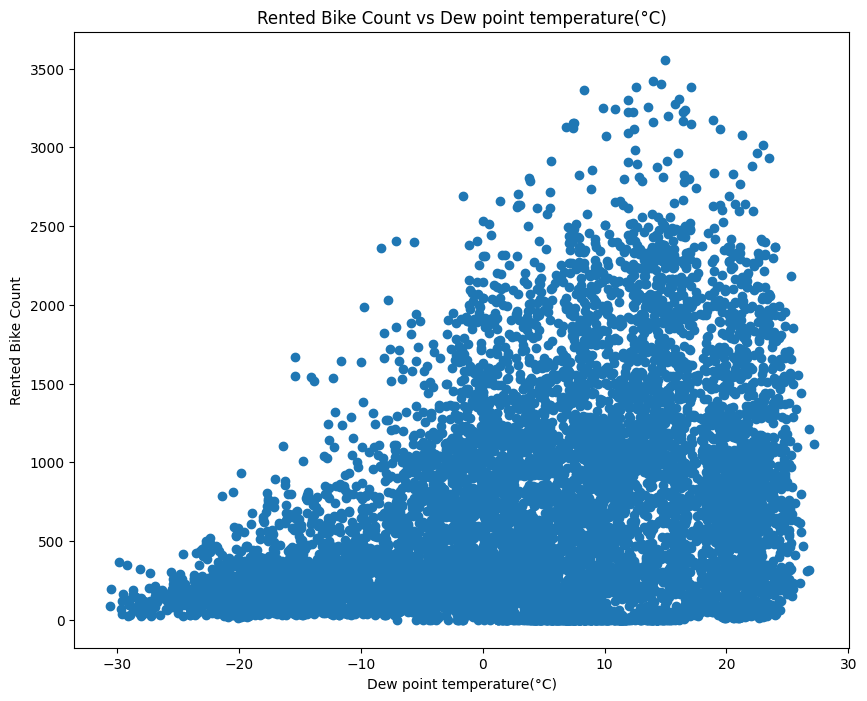

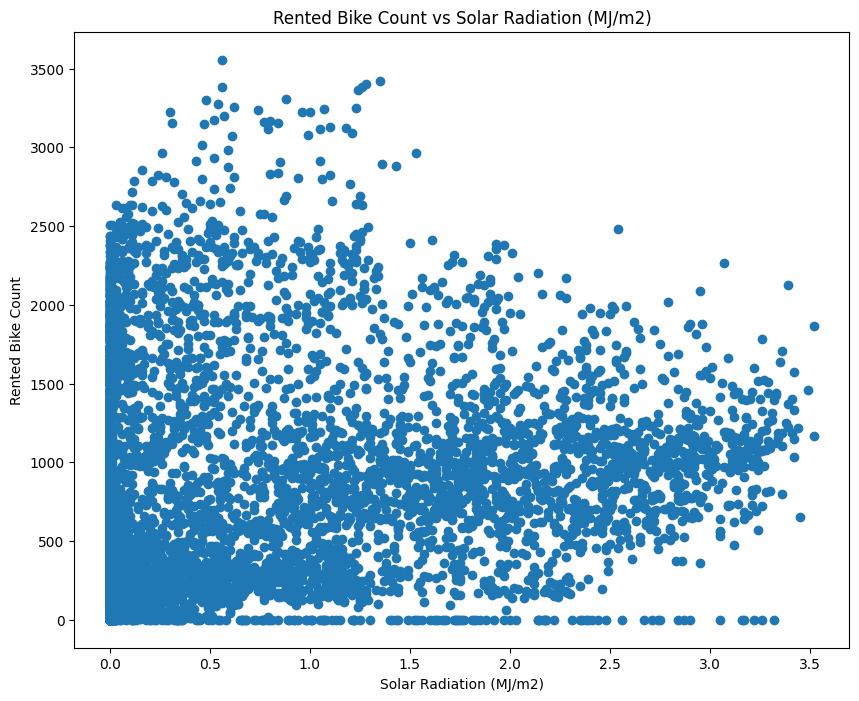

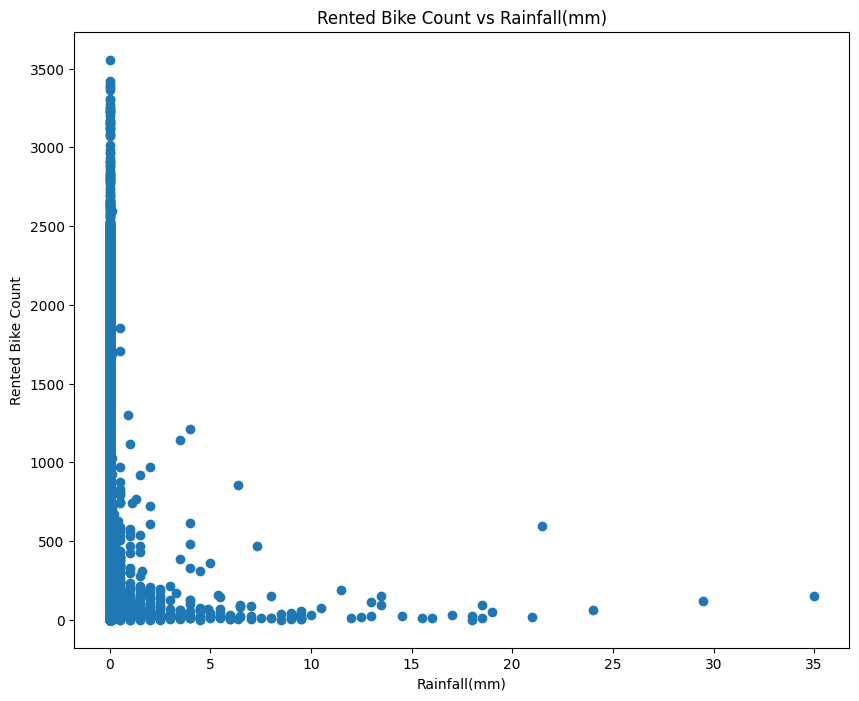

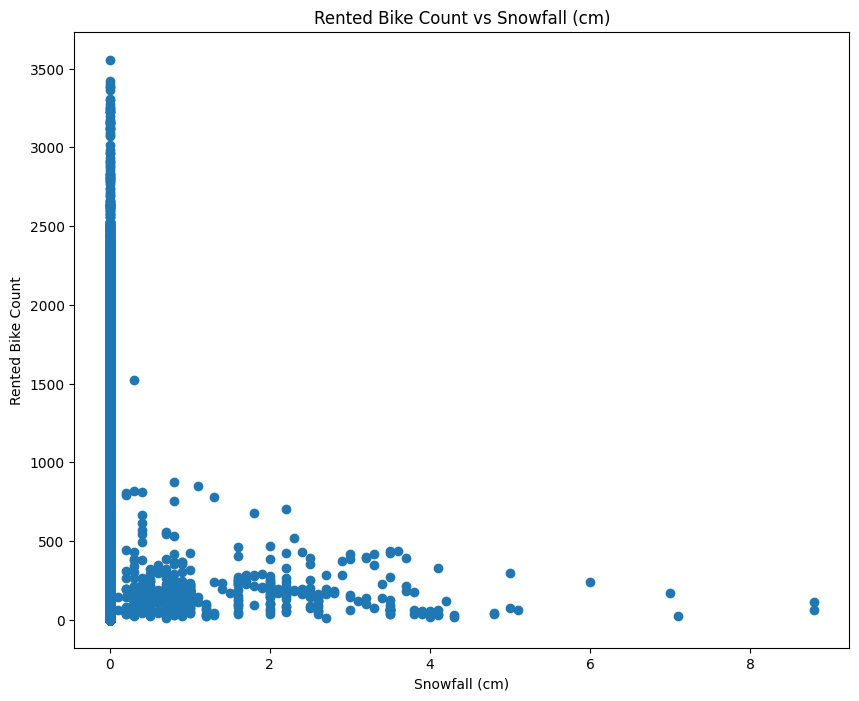

In [74]:
# Chart - 5 Scatter Plot
#visualization code
for column in df_num.columns:
  plt.figure(figsize=(10,8))
  plt.scatter(df_num[column],df_num['Rented Bike Count'])
  plt.title(f"Rented Bike Count vs {column}")
  plt.xlabel(column)
  plt.ylabel("Rented Bike Count")

##### 1. Why did you pick the specific chart?

Answer Here.

A scatter plot is used for bivariate analysis; hence, it is chosen to analyze multicollinearity and relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Insight we found is as follows:-
1. These is a relationship found between Bike Rented count and Temprature.
In Normal Temprature days bike rented count is increased.

2. In Days of Rainfall and snowfall Bike rented count is drop drastically.



#### Chart - 06 - Correlation Heatmap

In [75]:
# Correlation Heatmap visualization code

# Already plot in earlier analysis.

#### Chart - 07 - Pair Plot

<Figure size 1000x800 with 0 Axes>

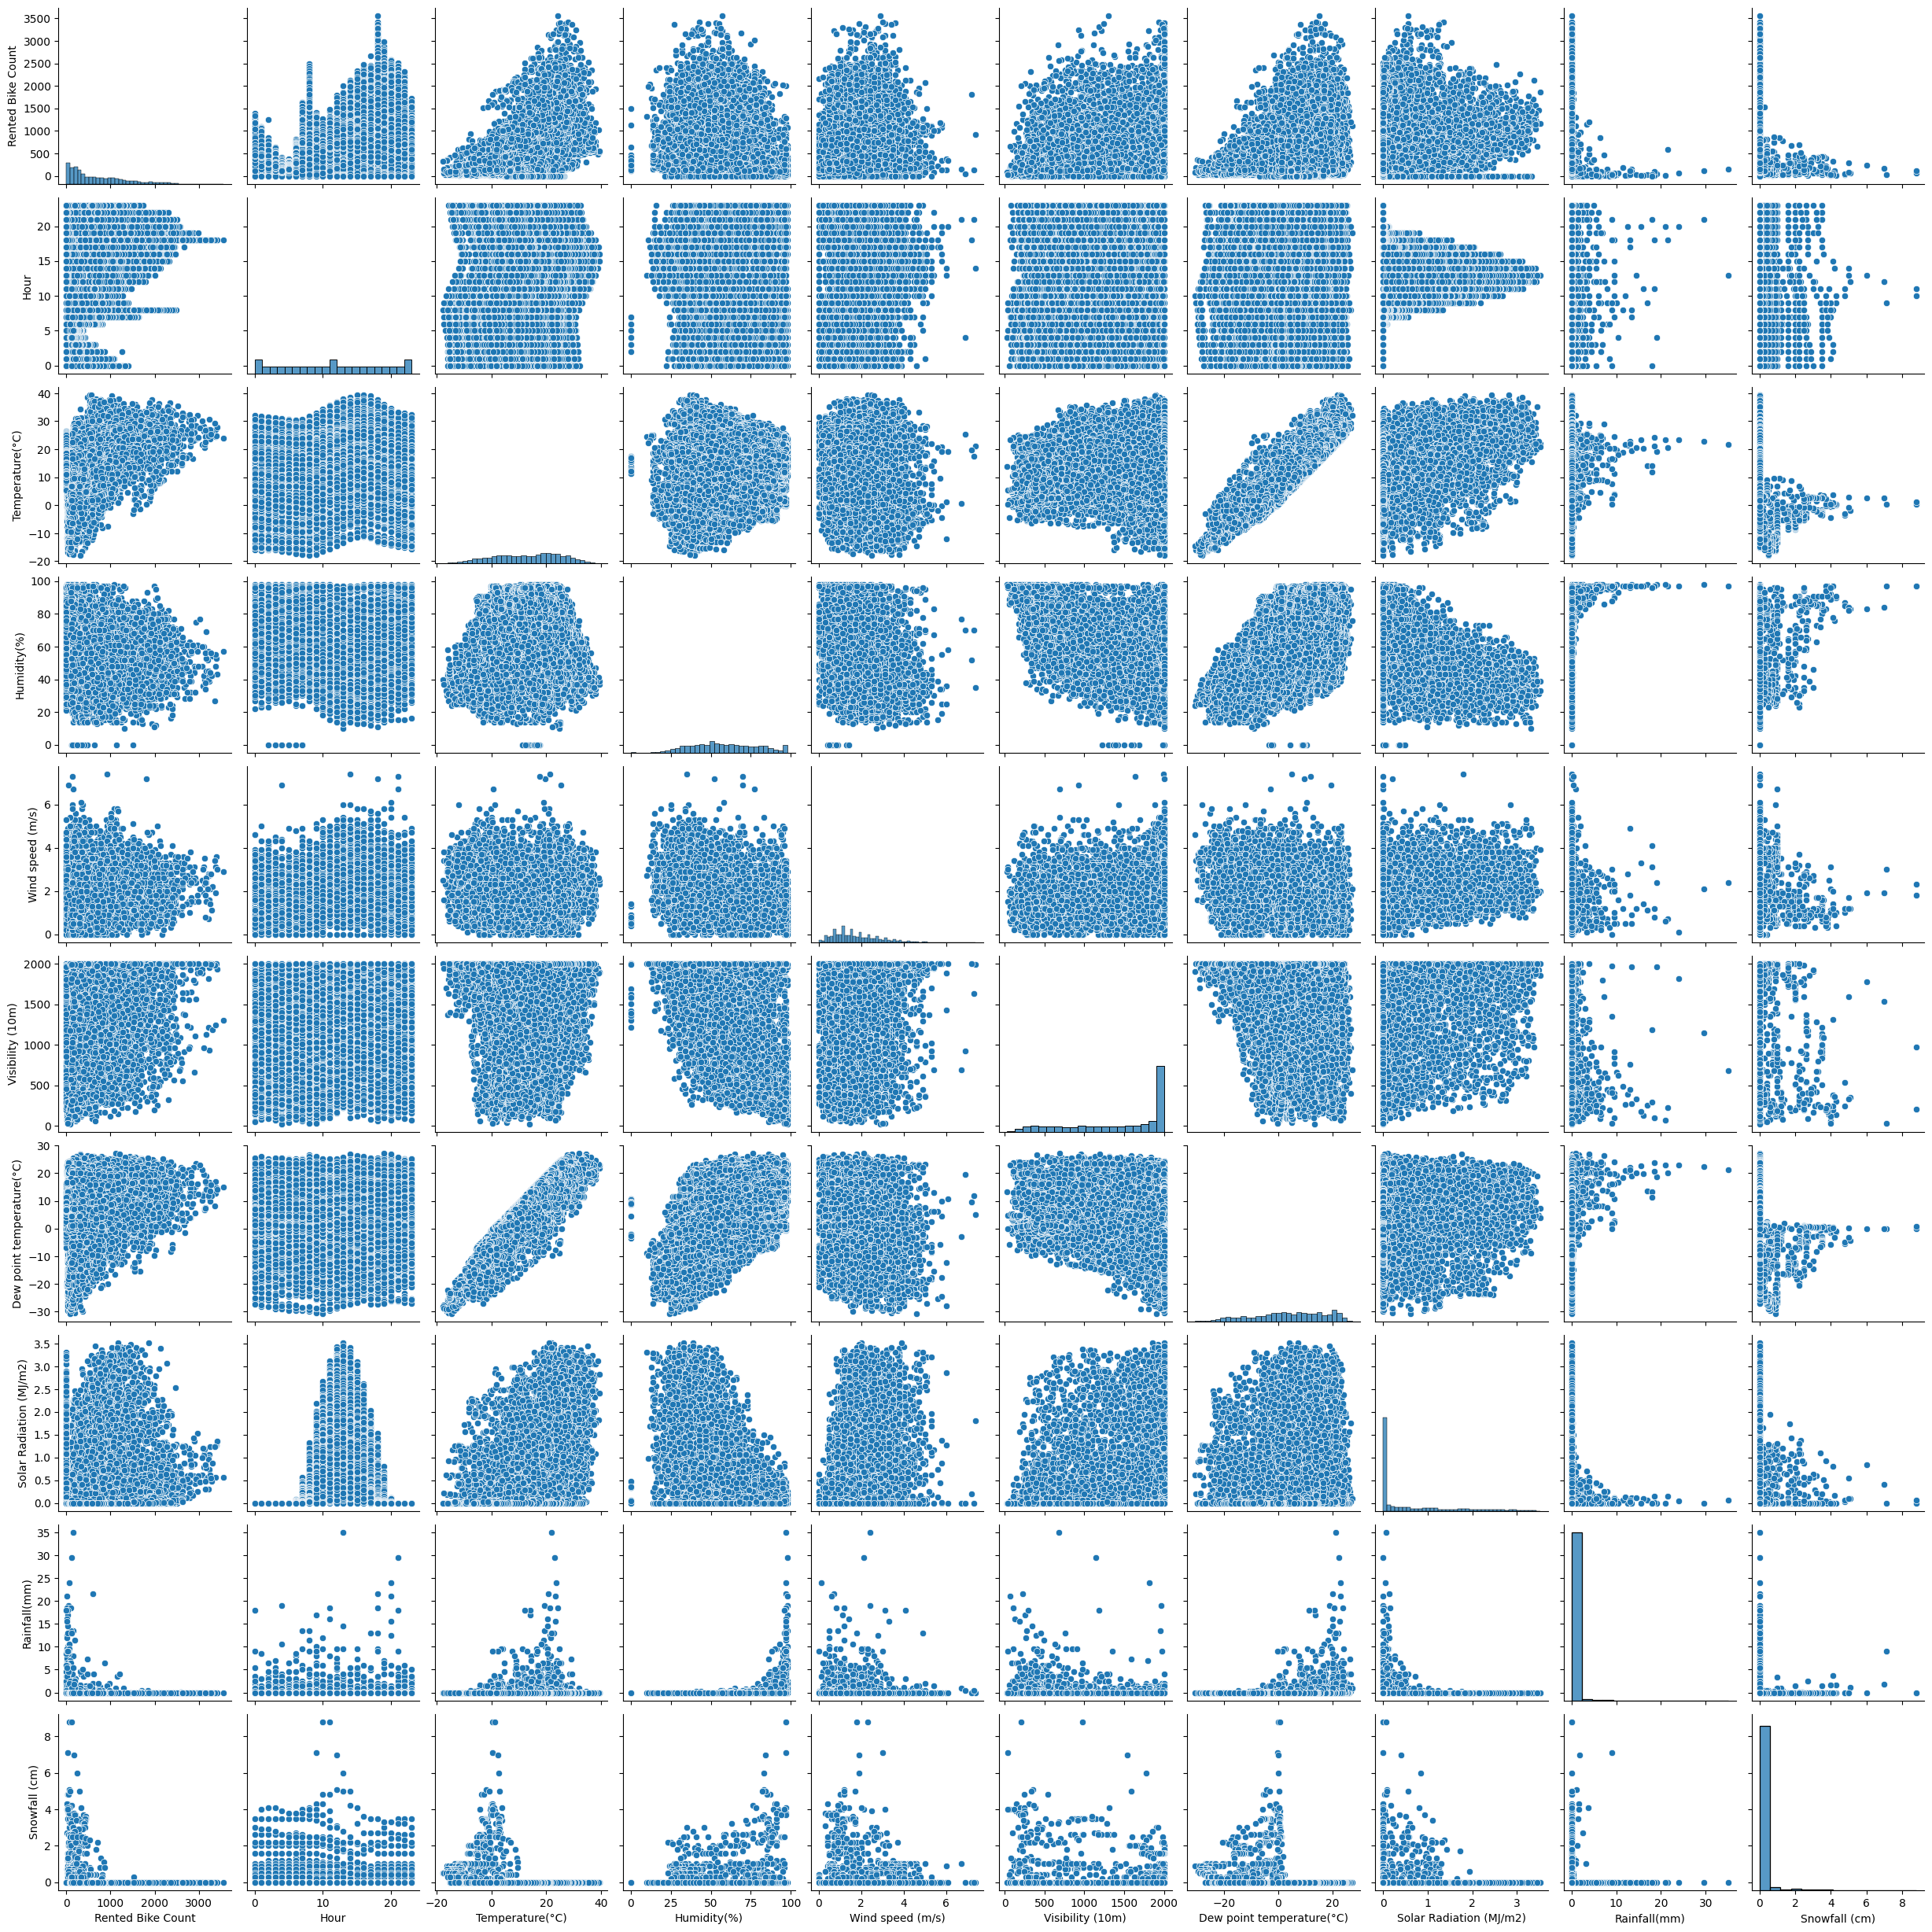

In [76]:
# Pair Plot visualization code
plt.figure(figsize=(10,8))
sns.pairplot(df_num)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A pair plot chart was chosen because it allows visualization of the distribution of individual variables as well as the relationships between multiple pairs of variables simultaneously. This helps in identifying correlations, patterns, and potential outliers effectively.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Insight we got from pair plot is as follows:-

1.Rented Bike Count vs Temperature: Expect a positive correlation — more rentals as temperature rises.

2.Rented Bike Count vs Wind Speed / Rainfall / Snowfall: Rentals drop sharply under adverse weather.

3.Temperature vs Dew Point Temperature: Strongly correlated, indicating redundancy.

4.Sudden spikes in Rainfall or Snowfall vs Rentals will appear as outliers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
***Effect of Temperature on Bike Rentals***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

H₀: Temperature (°C) has no significant effect on the number of rented bikes (βTemp = 0).

H₁: Temperature (°C) significantly affects the number of rented bikes (βTemp ≠ 0).

#### 2. Perform an appropriate statistical test.


===== OLS Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:01:36   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const 

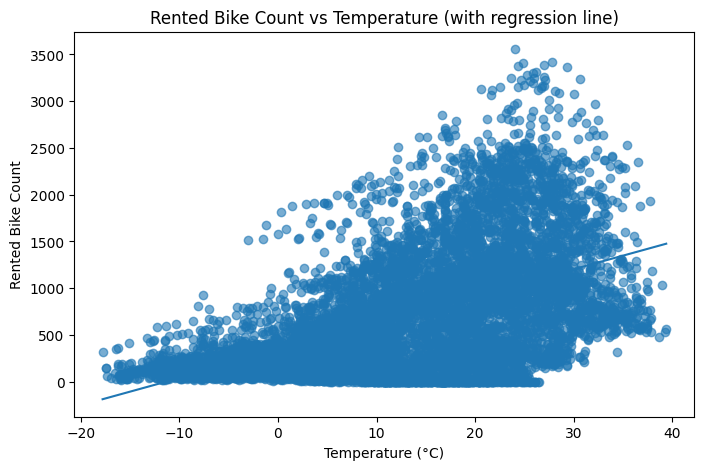

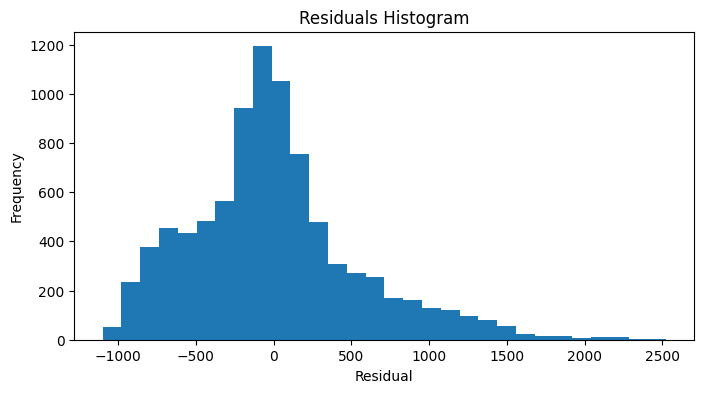

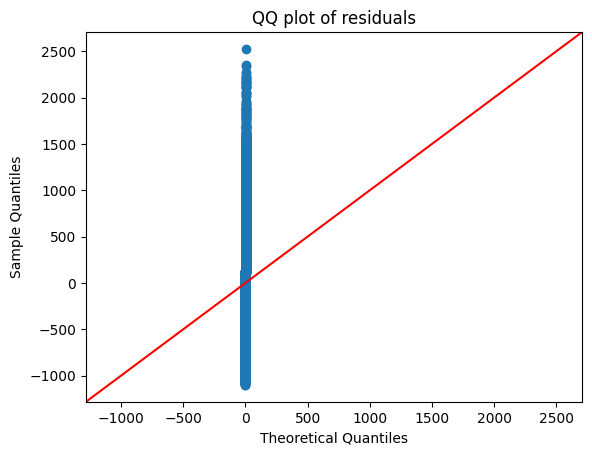

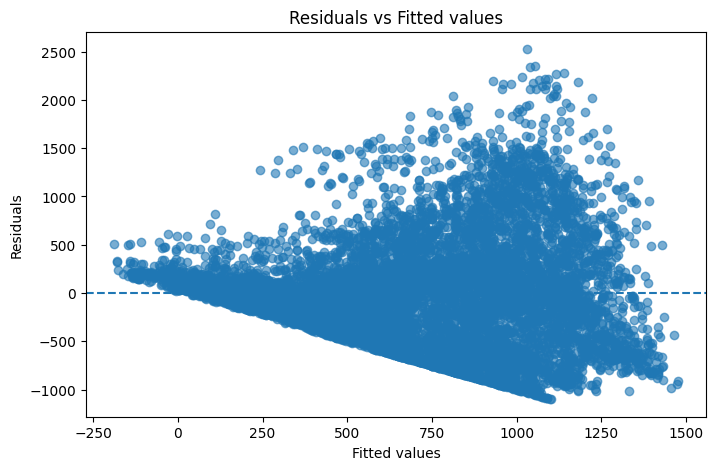


Result dict: {'beta_temp': np.float64(29.081098989299566), 'stderr_temp': np.float64(0.4861733913554679), 't_stat_temp': np.float64(59.81631143617399), 'p_value_temp': np.float64(0.0), 'conf_low_temp': 28.128084944779438, 'conf_high_temp': 30.034113033819693}


In [77]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm
from scipy import stats

ALPHA      = 0.05                           # define significance level

# Define X (predictor) and y (target)
y = df['Rented Bike Count']
X = df[['Temperature(°C)']]
X = sm.add_constant(X)  # adds intercept (alpha)

# Fit OLS regression: y = alpha + beta * Temp + epsilon
model = sm.OLS(y, X).fit()

#  Print regression summary
print("\n===== OLS Regression Summary =====")
print(model.summary())

# Extract test statistics for Temperature coefficient
coef = model.params['Temperature(°C)']
stderr = model.bse['Temperature(°C)']
t_stat = model.tvalues['Temperature(°C)']
p_value = model.pvalues['Temperature(°C)']
conf_low, conf_high = model.conf_int().loc['Temperature(°C)']
df_resid = int(model.df_resid)

# t critical (two-tailed)
t_crit = stats.t.ppf(1 - ALPHA/2, df_resid)

print("\n--- Temperature coefficient test ---")
print(f"Coefficient (beta_temp): {coef:.4f}")
print(f"Std. Error: {stderr:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"95% CI: [{conf_low:.4f}, {conf_high:.4f}]")
print(f"Degrees of freedom (resid): {df_resid}")
print(f"t-critical (two-tailed, alpha={ALPHA}): ±{t_crit:.4f}")

# Decision
if p_value < ALPHA:
    print(f"\nDecision: p-value ({p_value:.6f}) < {ALPHA} → Reject H0.")
    print("Meaning: Temperature has a statistically significant effect on Rented Bike Count.")
else:
    print(f"\nDecision: p-value ({p_value:.6f}) >= {ALPHA} → Fail to reject H0.")
    print("Meaning: No evidence that Temperature affects Rented Bike Count (at this alpha).")

#  Diagnostic plots (one plot per figure)
# a) Scatter + regression line
temps = df['Temperature(°C)'].values
preds = model.predict(X)

order = np.argsort(temps)
temps_sorted = temps[order]
preds_sorted = preds.values[order]

plt.figure(figsize=(8,5))
plt.scatter(temps, y, alpha=0.6)
plt.plot(temps_sorted, preds_sorted)   # regression line
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Temperature (with regression line)')
plt.show()

# b) Residuals histogram
plt.figure(figsize=(8,4))
plt.hist(model.resid, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# c) QQ-plot (residuals normality)
fig = sm.qqplot(model.resid, line='45')
plt.title('QQ plot of residuals')
plt.show()

# d) Residuals vs Fitted (check homoscedasticity)
plt.figure(figsize=(8,5))
plt.scatter(model.fittedvalues, model.resid, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

#  Optional: Save the coefficient and p-value for later use
result = {
    'beta_temp': coef,
    'stderr_temp': stderr,
    't_stat_temp': t_stat,
    'p_value_temp': p_value,
    'conf_low_temp': conf_low,
    'conf_high_temp': conf_high
}
print("\nResult dict:", result)

##### Which statistical test have you done to obtain P-Value?

**Answer Here.**
The p-value in regression summary comes from a two-tailed t-test on the regression coefficient.

##### Why did you choose the specific statistical test?

Answer Here.

Because it’s an estimate, it has a sampling distribution. Under the null hypothesis , this distribution (after scaling) follows a t-distribution.
That’s why the natural test for this is a t-test

### Hypothetical Statement - 2

**Effect of Humidity on Bike Rentals**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

H₀: Humidity (%) has no significant effect on the number of rented bikes (βHumidity = 0).

H₁: Humidity (%) significantly affects the number of rented bikes (βHumidity ≠ 0).


#### 2. Perform an appropriate statistical test.


===== OLS Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     364.1
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.48e-79
Time:                        13:01:37   Log-Likelihood:                -68922.
No. Observations:                8760   AIC:                         1.378e+05
Df Residuals:                    8758   BIC:                         1.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1

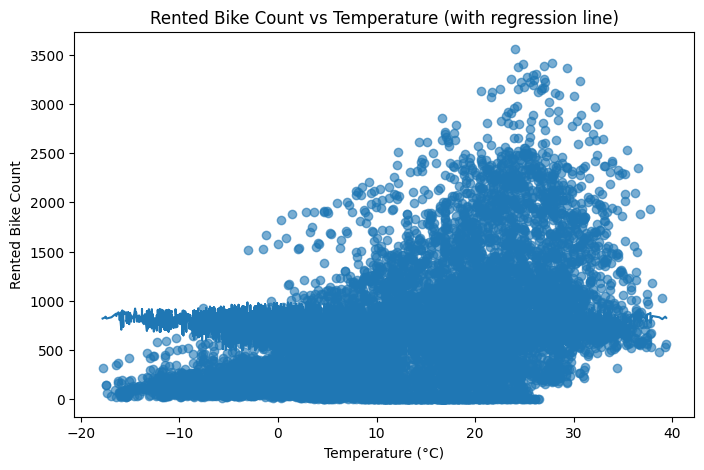

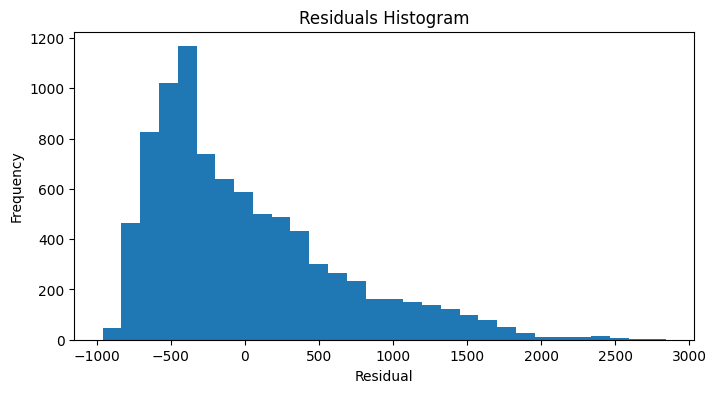

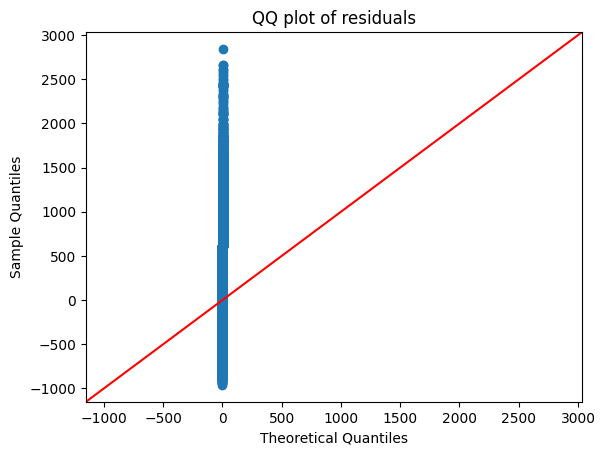

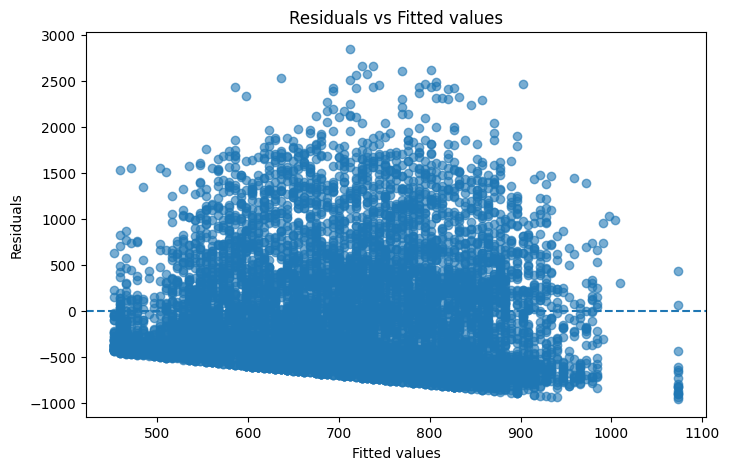


Result dict: {'beta_temp': np.float64(-6.328213650893206), 'stderr_temp': np.float64(0.3316513624141521), 't_stat_temp': np.float64(-19.0809216185001), 'p_value_temp': np.float64(1.4750651031311182e-79), 'conf_low_temp': -6.9783282229468355, 'conf_high_temp': -5.678099078839576}


In [78]:
# Perform Statistical Test to obtain P-Value


import statsmodels.api as sm
from scipy import stats

ALPHA      = 0.05                           # define significance level

# Define X (predictor) and y (target)
y = df['Rented Bike Count']
X = df[['Humidity(%)']]
X = sm.add_constant(X)  # adds intercept (alpha)

# Fit OLS regression: y = alpha + beta * Humidity + epsilon
model = sm.OLS(y, X).fit()

#  Print regression summary
print("\n===== OLS Regression Summary =====")
print(model.summary())

# Extract test statistics for Humidity %
coef = model.params['Humidity(%)']
stderr = model.bse['Humidity(%)']
t_stat = model.tvalues['Humidity(%)']
p_value = model.pvalues['Humidity(%)']
conf_low, conf_high = model.conf_int().loc['Humidity(%)']
df_resid = int(model.df_resid)

# t critical (two-tailed)
t_crit = stats.t.ppf(1 - ALPHA/2, df_resid)

print("\n--- Humidity % test ---")
print(f"Coefficient (beta_temp): {coef:.4f}")
print(f"Std. Error: {stderr:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"95% CI: [{conf_low:.4f}, {conf_high:.4f}]")
print(f"Degrees of freedom (resid): {df_resid}")
print(f"t-critical (two-tailed, alpha={ALPHA}): ±{t_crit:.4f}")

# Decision
if p_value < ALPHA:
    print(f"\nDecision: p-value ({p_value:.6f}) < {ALPHA} → Reject H0.")
    print("Meaning: Humidity has a statistically significant effect on Rented Bike Count.")
else:
    print(f"\nDecision: p-value ({p_value:.6f}) >= {ALPHA} → Fail to reject H0.")
    print("Meaning: No evidence that Humidity affects Rented Bike Count (at this alpha).")

#  Diagnostic plots (one plot per figure)
# a) Scatter + regression line
temps = df['Temperature(°C)'].values
preds = model.predict(X)

order = np.argsort(temps)
temps_sorted = temps[order]
preds_sorted = preds.values[order]

plt.figure(figsize=(8,5))
plt.scatter(temps, y, alpha=0.6)
plt.plot(temps_sorted, preds_sorted)   # regression line
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Temperature (with regression line)')
plt.show()

# b) Residuals histogram
plt.figure(figsize=(8,4))
plt.hist(model.resid, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# c) QQ-plot (residuals normality)
fig = sm.qqplot(model.resid, line='45')
plt.title('QQ plot of residuals')
plt.show()

# d) Residuals vs Fitted (check homoscedasticity)
plt.figure(figsize=(8,5))
plt.scatter(model.fittedvalues, model.resid, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

#  Optional: Save the coefficient and p-value for later use
result = {
    'beta_temp': coef,
    'stderr_temp': stderr,
    't_stat_temp': t_stat,
    'p_value_temp': p_value,
    'conf_low_temp': conf_low,
    'conf_high_temp': conf_high
}
print("\nResult dict:", result)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

The p-value in regression summary comes from a two-tailed t-test on the regression coefficient.

##### Why did you choose the specific statistical test?

Answer Here.

Since it is an estimate, it follows a sampling distribution. Under the null hypothesis, this distribution (once standardized) conforms to a t-distribution, which makes the t-test the appropriate choice.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [79]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()
#Earlier tested that There is No Missing Value

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
DayPart                      0
dtype: int64

### 2. Handling Outliers

In [80]:
# Handling Outliers & Outlier treatments
iqr = df['Wind speed (m/s)'].quantile(0.75) - df['Wind speed (m/s)'].quantile(0.25)
lower_bound = df['Wind speed (m/s)'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['Wind speed (m/s)'].quantile(0.75) + (1.5 * iqr)
Outliers = df[((df['Wind speed (m/s)'] < lower_bound) | (df['Wind speed (m/s)'] > upper_bound))]
Outliers


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
82   2017-12-04                311    10             -1.1           40   
84   2017-12-04                393    12             -0.3           38   
85   2017-12-04                391    13              0.0           30   
86   2017-12-04                338    14              0.1           27   
87   2017-12-04                341    15             -0.1           25   
...         ...                ...   ...              ...          ...   
7934 2018-10-27               1183    14             10.8           37   
7937 2018-10-27               1176    17              9.5           34   
7985 2018-10-29               1274    17             10.0           43   
8242 2018-11-09                  0    10             11.3           68   
8245 2018-11-09                  0    13             14.0           46   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
82                 4.5              2000                      -13.0   
84                 4.8              1823                      -12.9   
85                 5.4              1938                      -15.5   
86                 4.5              2000                      -16.7   
87                 5.8              2000                      -17.8   
...                ...               ...                        ...   
7934               4.4              2000                       -3.3   
7937               5.7              2000                       -5.6   
7985               4.9              2000                       -2.0   
8242               4.7              1984                        5.5   
8245               5.3               927                        2.5   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
82                       0.64           0.0            0.0  Winter   
84                       1.11           0.0            0.0  Winter   
85                       1.17           0.0            0.0  Winter   
86                       1.09           0.0            0.0  Winter   
87                       0.88           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
7934                     1.29           0.0            0.0  Autumn   
7937                     0.45           0.0            0.0  Autumn   
7985                     0.43           0.0            0.0  Autumn   
8242                     0.44           0.0            0.0  Autumn   
8245                     1.68           0.0            0.0  Autumn   

         Holiday Functioning Day    DayPart  
82    No Holiday             Yes    Morning  
84    No Holiday             Yes    Morning  
85    No Holiday             Yes  Afternoon  
86    No Holiday             Yes  Afternoon  
87    No Holiday             Yes  Afternoon  
...          ...             ...        ...  
7934  No Holiday             Yes  Afternoon  
7937  No Holiday             Yes  Afternoon  
7985  No Holiday             Yes  Afternoon  
8242  No Holiday              No    Morning  
8245  No Holiday              No  Afternoon  

[161 rows x 15 columns]

In [81]:
# Windfall Outlier treatment and extracting from DataFrame

df = df[((df['Wind speed (m/s)'] > lower_bound) | (df['Wind speed (m/s)'] < upper_bound))]

In [82]:
# Handling Outliers & Outlier treatments
iqr = df['Rainfall(mm)'].quantile(0.75) - df['Rainfall(mm)'].quantile(0.25)
lower_bound = df['Rainfall(mm)'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['Rainfall(mm)'].quantile(0.75) + (1.5 * iqr)
Outliers_rain = df[((df['Rainfall(mm)'] < lower_bound) | (df['Rainfall(mm)'] > upper_bound))]
Outliers_rain

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
51   2017-12-03                117     3              3.4           71   
54   2017-12-03                 13     6              3.4           86   
57   2017-12-03                152     9              3.5           91   
78   2017-12-04                200     6              1.2           76   
120  2017-12-06                145     0             -2.8           77   
...         ...                ...   ...              ...          ...   
8241 2018-11-09                  0     9             10.8           78   
8520 2018-11-21                119     0              7.2           74   
8523 2018-11-21                112     3              6.5           87   
8601 2018-11-24                 24     9              0.3           97   
8604 2018-11-24                167    12              2.5           84   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
51                 1.6              1011                       -1.3   
54                 2.5               278                        1.2   
57                 1.8               231                        2.1   
78                 3.7               371                       -2.5   
120                0.0               331                       -6.2   
...                ...               ...                        ...   
8241               2.6              1985                        7.1   
8520               1.2               772                        2.8   
8523               1.0               710                        4.4   
8601               3.0                34                       -0.1   
8604               1.9              1538                        0.0   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
51                       0.00           0.5            0.0  Winter   
54                       0.00           1.0            0.0  Winter   
57                       0.02           2.5            0.0  Winter   
78                       0.00           0.1            0.0  Winter   
120                      0.00           0.1            0.1  Winter   
...                       ...           ...            ...     ...   
8241                     0.13           0.5            0.0  Autumn   
8520                     0.00           0.2            0.0  Autumn   
8523                     0.00           1.0            0.0  Autumn   
8601                     0.00           9.1            7.1  Autumn   
8604                     0.40           1.8            7.0  Autumn   

         Holiday Functioning Day  DayPart  
51    No Holiday             Yes    Night  
54    No Holiday             Yes  Morning  
57    No Holiday             Yes  Morning  
78    No Holiday             Yes  Morning  
120   No Holiday             Yes    Night  
...          ...             ...      ...  
8241  No Holiday              No  Morning  
8520  No Holiday             Yes    Night  
8523  No Holiday             Yes    Night  
8601  No Holiday             Yes  Morning  
8604  No Holiday             Yes  Morning  

[528 rows x 15 columns]

In [83]:
# Treating outlier in Rainfall using log transformation

df["Rainfall(mm)_log"] = np.log1p(df['Rainfall(mm)'])
df[["Rainfall(mm)_log","Rainfall(mm)"]].tail()

Rainfall(mm)_log  Rainfall(mm)
8755               0.0           0.0
8756               0.0           0.0
8757               0.0           0.0
8758               0.0           0.0
8759               0.0           0.0

In [84]:
# drop Dew point temperature and Humidity (since it’s mathematically derived from temperature).
df = df.drop(columns='Dew point temperature(°C)')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Humidity_scaled"] = scaler.fit_transform(df[["Humidity(%)"]])
df = df.drop(columns='Humidity(%)')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.
1. Outlier found in Windfall , Data looks not relevant and errornous hence removed.
2. Rainfall(mm) outliers converted to log transformation as information looks genuine and relevant to context.

### 3. Categorical Encoding

In [85]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
df[['Seasons','Holiday','Functioning Day']] = df[['Seasons','Holiday','Functioning Day']].apply(LabelEncoder().fit_transform)
df.Seasons.unique()
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0 2017-12-01                254     0             -5.2               2.2   
1 2017-12-01                204     1             -5.5               0.8   
2 2017-12-01                173     2             -6.0               1.0   
3 2017-12-01                107     3             -6.2               0.9   
4 2017-12-01                 78     4             -6.0               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day DayPart  Rainfall(mm)_log  \
0        3        1                1   Night               0.0   
1        3        1                1   Night               0.0   
2        3        1                1   Night               0.0   
3        3        1                1   Night               0.0   
4        3        1                1   Night               0.0   

   Humidity_scaled  
0        -1.042483  
1        -0.993370  
2        -0.944257  
3        -0.895144  
4        -1.091596

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

we have used Label Encoding because it:

1. Converts categorical variables into numeric form, which is essential for ML models.

2. Preserves ordinal relationships (Seasons).

3. Avoids unnecessary dimensionality.

4. Works well with tree-based models (RF, XGB) that don’t assume numerical distance between labels.

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [86]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = pd.DataFrame()
df_feature = df.drop(columns='Rented Bike Count').select_dtypes(include='number')
df_vif["Features"] = df_feature.columns
df_vif["VIF"] = [variance_inflation_factor(df_feature.values, i) for i in range(df_feature.shape[1])]
df_vif

Features        VIF
0                      Hour   4.322541
1           Temperature(°C)   3.713454
2          Wind speed (m/s)   4.740078
3          Visibility (10m)   8.697322
4   Solar Radiation (MJ/m2)   2.739701
5              Rainfall(mm)   4.500631
6             Snowfall (cm)   1.132297
7                   Seasons   3.365775
8                   Holiday  14.684227
9           Functioning Day  18.650300
10         Rainfall(mm)_log   4.970364
11          Humidity_scaled   2.507760

#### 2. Feature Selection

In [87]:
# Select features to avoid overfitting
df = df.drop(columns=['Holiday','Functioning Day','DayPart'])

In [88]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0 2017-12-01                254     0             -5.2               2.2   
1 2017-12-01                204     1             -5.5               0.8   
2 2017-12-01                173     2             -6.0               1.0   
3 2017-12-01                107     3             -6.2               0.9   
4 2017-12-01                 78     4             -6.0               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons  Rainfall(mm)_log  Humidity_scaled  
0        3               0.0        -1.042483  
1        3               0.0        -0.993370  
2        3               0.0        -0.944257  
3        3               0.0        -0.895144  
4        3               0.0        -1.091596

##### What all feature selection methods have you used  and why?

Answer Here.

The Variance Inflation Factor (VIF) is  used as a feature selection to identify multicollinearity between predictors.

some of reasons of using it is as follows:-
1. Multicollinearity Check Before Modeling.
2. Improves Model Interpretability.
3. Helps Reduce Overfitting.


##### Which all features you found important and why?

Answer Here.

Important Features are below:-
Hour, Temperature(°C), Wind speed (m/s), Visibility (10m), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Rainfall(mm)_log, Humidity_scaled.

because above cited features have VIF Value less than 10.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [89]:
# Transform Your data
# No

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [90]:
# DImensionality Reduction (If needed)

# We don't required further dimension reduction as we have alreay performed necessary steps for the same.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [91]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [92]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

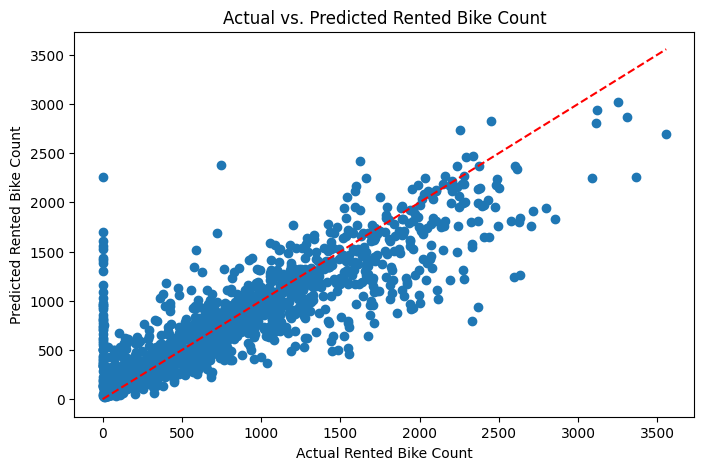

In [93]:
# ML Model - 1  Implementation  Model Name -Random Forest
# Features & Target
X = df.drop(columns=["Rented Bike Count", "Date"])  # drop target + non-numeric
y = df["Rented Bike Count"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(random_state=42)

# Fit the Algorithm

rf.fit(X_train, y_train)

# Predict on the model

y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs. Predicted Rented Bike Count')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart
# Performance
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"R2 Score: {rf_r2}")
print(f"RMSE: {rf_rmse}")




R2 Score: 0.783386895438392
RMSE: 300.41810040997586


#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Hyperparameter tuning (RandomizedSearchCV for speed)
param_dist_rf = {
    "max_depth": [10, 20],
    "min_samples_split": [ 5, 10]
}
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                               n_iter=2, cv=5, scoring="r2", random_state=42)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print(best_rf)

# Fit the Algorithm
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print(best_rf)

# Predict on the model
y_pred_rf = best_rf.predict(X_test)

# Cross Validation Score
cv_rf = cross_val_score(best_rf, X, y, cv=5, scoring="r2").mean()
print(f"RandomForest Cross-Validation Score: {cv_rf}")

# Performance post tuning the parameter
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"R2 Score: {rf_r2}")
print(f"RMSE: {rf_rmse}")

RandomForestRegressor(max_depth=20, min_samples_split=10, random_state=42)
RandomForestRegressor(max_depth=20, min_samples_split=10, random_state=42)
RandomForest Cross-Validation Score: 0.44400690467522336
R2 Score: 0.78445177166963
RMSE: 299.6787586375917


In [96]:
# Evaluation Chart

print(f"Random Forest -> R²: {rf_r2:.3f}, RMSE: {rf_rmse:.2f}, CV Score: {cv_rf:.3f}")

Random Forest -> R²: 0.784, RMSE: 299.68, CV Score: 0.444


##### Which hyperparameter optimization technique have you used and why?

Answer Here.
RandomizedSearchCV is used for hyperparameter because it best suted for speed in random forest model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

R2 Score and RMSE Score improved with some decimal points.

Performance before tuning -
R2 Score: 0.783386895438392
RMSE: 300.41810040997586

Performance Post tuned the model -
R2 Score: 0.78445177166963
RMSE: 299.6787586375917


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:

#  XGBoost Model used for 2nd Model

xgb = XGBRegressor(random_state=42, objective="reg:squarederror")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Performance
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"R2 Score: {xgb_r2}")
print(f"RMSE: {xgb_rmse}")



R2 Score: 0.7722892761230469
RMSE: 308.0175395777


#### 2. Cross- Validation & Hyperparameter Tuning

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)
XGBoost Cross-Validation Score: 0.4783329367637634
XGBoost       -> R²: 0.772, RMSE: 308.02, CV Score: 0.478


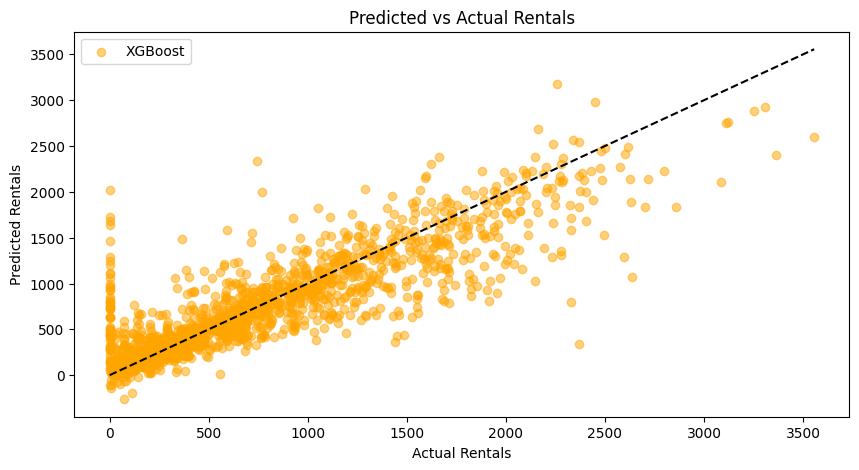

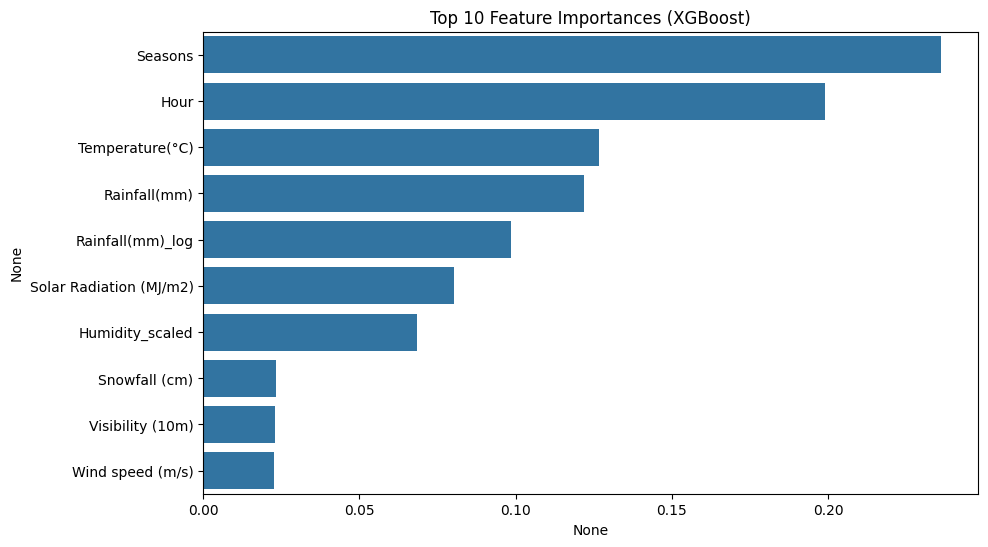

In [98]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Hyperparameter tuning
param_dist_xgb = {
    "n_estimators": [200, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1],
    "colsample_bytree": [0.7, 0.8, 1]
}
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb,
                                n_iter=10, cv=5, scoring="r2", random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
print(best_xgb)



#Cross-validation xgboost
cv_xgb = cross_val_score(best_xgb, X, y, cv=5, scoring="r2").mean()
print(f"XGBoost Cross-Validation Score: {cv_xgb}")

#  Visualizing evaluation Metric Score chart

print(f"XGBoost       -> R²: {xgb_r2:.3f}, RMSE: {xgb_rmse:.2f}, CV Score: {cv_xgb:.3f}")

# Plot Predicted vs Actual
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label="XGBoost", color="orange")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.legend()
plt.title("Predicted vs Actual Rentals")
plt.show()

# Feature importance (XGBoost)
xgb_importances = best_xgb.feature_importances_
feat_importance = pd.Series(xgb_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10])
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


# Predict on the model

y_pred_xgb = best_xgb.predict(X_test)


In [99]:
# Performance of tuned model over old model

xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"R2 Score: {xgb_r2}")
print(f"RMSE: {xgb_rmse}")

R2 Score: 0.7894347906112671
RMSE: 296.19452275911516


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

RandomizedSearchCV is used as hyperparameter because RandomizedSearchCV samples across the parameter space efficiently, balancing speed vs. performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes Model is imporved post tuning

Xgb model performance before tuning

R2 Score: 0.7722892761230469
RMSE: 308.0175395777

model performance before tuning

R2 Score: 0.7894347906112671
RMSE: 296.19452275911516

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

We used R² and RMSE:

R² (Coefficient of Determination):

Measures how much variance in bike rentals is explained by the model.

Business impact: A higher R² means the business can rely on the model for planning bike supply. If R² is too low, predictions may misguide resource allocation (too many or too few bikes at stations).

RMSE (Root Mean Squared Error):

Measures average prediction error (in bike count units).

Example: RMSE = 300 → On average, the model is off by 300 rentals per hour.

Business impact: Lower RMSE means better demand estimation, helping reduce costs (unused bikes, lost rental opportunities).

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

RMSE is the primary metric for business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

XGBoost to be choose due to below key points

Better cross-validation performance → more generalizable.

Handles non-linear interactions and seasonality well.

Allows fine-tuned control with hyperparameters (learning rate, depth, etc.).

More robust for forecasting real-world demand.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

Model Explanation:

XGBoost builds an ensemble of decision trees sequentially, where each new tree tries to correct the errors of the previous trees.

It balances bias and variance, reducing overfitting while capturing non-linear demand patterns.

Feature Importance (from SHAP values / XGBoost feature importance):
Example (typical results from bike rental data):

Hour of Day → Peak demand hours (morning commute, evening commute).

Temperature (°C) → More rentals when the weather is pleasant.

Functioning Day → No rentals on non-functioning days.

Seasons → Demand changes between summer, winter, etc.

Humidity / Rainfall → High humidity or rain reduces rentals.

Holiday → Different rental pattern on holidays.

Explainability Tool Used:

SHAP (SHapley Additive exPlanations): Shows how each feature contributes to a specific prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [100]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [101]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

The project demonstrates that machine learning models, particularly XGBoost, can accurately forecast bike rental demand using historical and weather-related data. These insights empower stakeholders to make data-driven operational decisions, ultimately improving service efficiency and profitability.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***